In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os 
import numpy as np

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', random_state=42))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

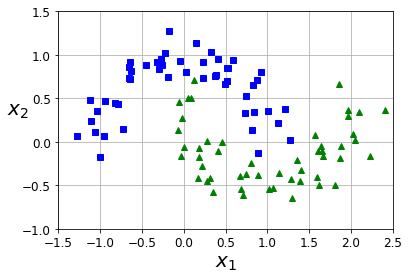

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[2], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [24]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
X.ravel()

array([1.4, 0.2, 1.4, 0.2, 1.3, 0.2, 1.5, 0.2, 1.4, 0.2, 1.7, 0.4, 1.4,
       0.3, 1.5, 0.2, 1.4, 0.2, 1.5, 0.1, 1.5, 0.2, 1.6, 0.2, 1.4, 0.1,
       1.1, 0.1, 1.2, 0.2, 1.5, 0.4, 1.3, 0.4, 1.4, 0.3, 1.7, 0.3, 1.5,
       0.3, 1.7, 0.2, 1.5, 0.4, 1. , 0.2, 1.7, 0.5, 1.9, 0.2, 1.6, 0.2,
       1.6, 0.4, 1.5, 0.2, 1.4, 0.2, 1.6, 0.2, 1.6, 0.2, 1.5, 0.4, 1.5,
       0.1, 1.4, 0.2, 1.5, 0.2, 1.2, 0.2, 1.3, 0.2, 1.4, 0.1, 1.3, 0.2,
       1.5, 0.2, 1.3, 0.3, 1.3, 0.3, 1.3, 0.2, 1.6, 0.6, 1.9, 0.4, 1.4,
       0.3, 1.6, 0.2, 1.4, 0.2, 1.5, 0.2, 1.4, 0.2, 4.7, 1.4, 4.5, 1.5,
       4.9, 1.5, 4. , 1.3, 4.6, 1.5, 4.5, 1.3, 4.7, 1.6, 3.3, 1. , 4.6,
       1.3, 3.9, 1.4, 3.5, 1. , 4.2, 1.5, 4. , 1. , 4.7, 1.4, 3.6, 1.3,
       4.4, 1.4, 4.5, 1.5, 4.1, 1. , 4.5, 1.5, 3.9, 1.1, 4.8, 1.8, 4. ,
       1.3, 4.9, 1.5, 4.7, 1.2, 4.3, 1.3, 4.4, 1.4, 4.8, 1.4, 5. , 1.7,
       4.5, 1.5, 3.5, 1. , 3.8, 1.1, 3.7, 1. , 3.9, 1.2, 5.1, 1.6, 4.5,
       1.5, 4.5, 1.6, 4.7, 1.5, 4.4, 1.3, 4.1, 1.3, 4. , 1.3, 4.

In [25]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                       max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.ravel()

array([-1.01297765, -1.04211089, -1.01297765, -1.04211089, -1.08231219,
       -1.04211089, -0.94364311, -1.04211089, -1.01297765, -1.04211089,
       -0.80497402, -0.68644165, -1.01297765, -0.86427627, -0.94364311,
       -1.04211089, -1.01297765, -1.04211089, -0.94364311, -1.21994552,
       -0.94364311, -1.04211089, -0.87430856, -1.04211089, -1.01297765,
       -1.21994552, -1.22098127, -1.21994552, -1.15164673, -1.04211089,
       -0.94364311, -0.68644165, -1.08231219, -0.68644165, -1.01297765,
       -0.86427627, -0.80497402, -0.86427627, -0.94364311, -0.86427627,
       -0.80497402, -1.04211089, -0.94364311, -0.68644165, -1.29031581,
       -1.04211089, -0.80497402, -0.50860702, -0.66630494, -1.04211089,
       -0.87430856, -1.04211089, -0.87430856, -0.68644165, -0.94364311,
       -1.04211089, -1.01297765, -1.04211089, -0.87430856, -1.04211089,
       -0.87430856, -1.04211089, -0.94364311, -0.68644165, -0.94364311,
       -1.21994552, -1.01297765, -1.04211089, -0.94364311, -1.04

In [27]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("Linear SVC:                  ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

Linear SVC:                   [0.28474027] [[1.0536456  1.09903032]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


In [37]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
print(w1)
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
print(b1)
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

-0.958704766110214
-0.2590831825397911


In [45]:
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])
line1

array([[-11.56182566,   6.03130279],
       [ 17.28382566,  -4.7506782 ]])

[0, 5.5, 0, 2]

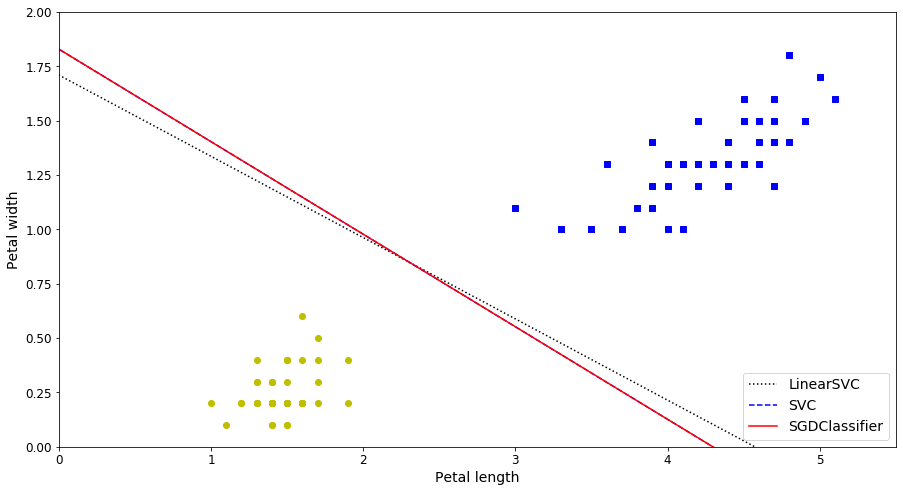

In [84]:
plt.figure(figsize=(15, 8))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--",  label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.axis([0, 5.5, 0, 2])

In [90]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [86]:
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [92]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

d:\user\desktop\untitled\venv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [93]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.89495

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)